## Постановка задачи

Предсказание цены дома в King County, USA.

**Размер датасета**:
- **Строки:** 21613
- **Столбцы:** 21

**Названия столбцов:**

* **id**: уникальный идентификатор каждой проданной недвижимости  
* **date**: дата продажи дома  
* **price**: цена продажи дома  
* **bedrooms**: количество спален  
* **bathrooms**: количество ванных комнат (где .5 означает комнату с туалетом без душа)  
* **sqft_living**: общая площадь жилых помещений (в квадратных футах)  
* **sqft_lot**: площадь земельного участка (в квадратных футах)  
* **floors**: количество этажей  
* **waterfront**: признак, находится ли недвижимость у воды (1 = Да, 0 = Нет)  
* **view**: рейтинг вида из дома от 0 до 4 (чем больше, тем лучше вид)  
* **condition**: состояние жилья (оценка от 1 до 5, где 1 - плохое, 5 - отличное)  
* **grade**: оценка качества конструкции и дизайна (от 1 до 13)  
  * 1-3 - низкое качество,  
  * 7 - среднее,  
  * 11-13 - высокое качество)  
* **sqft_above**: площадь жилой зоны над уровнем земли (в квадратных футах)  
* **sqft_basement**: площадь подвала (в квадратных футах)  
* **yr_built**: год постройки дома  
* **yr_renovated**: год последней реконструкции дома (0, если не реконструировался)  
* **zipcode**: почтовый индекс района, где находится дом  
* **lat**: широта  
* **long**: долгота  
* **sqft_living15**: средняя площадь жилого пространства ближайших 15 соседей  
* **sqft_lot15**: средняя площадь земельных участков ближайших 15 соседей 

## Импорт библиотек

In [2]:
# Необходимо для корректной работы внешних .py файлов
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import random
import numpy as np
import pandas as pd

from plots import (
    plot_hist_numeric,
    plot_all_numeric,
    plot_all_categorical,
    plot_phik,
    plot_numeric_relationship,
    plot_numeric_vs_categorical_boxplot,
    plot_price_trend,
)

c:\Users\Kirill\Desktop\ML_Projects\ml-regression\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# фиксируем состояние генератора псевдослучайных чисел.
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

## 1. Препроцессинг данных

In [6]:
df = pd.read_csv("./kc_house_data.csv")

In [7]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  str    
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long           21

In [ ]:
# Преобразование строки в datetime
df["date"] = pd.to_datetime(df["date"], format="%Y%m%dT%H%M%S")

# Преобразование даты в удобные признаки
df["dayofweek"] = df["date"].dt.dayofweek
df["quarter"] = df["date"].dt.quarter
df["is_month_start"] = pd.to_numeric(df["date"].dt.is_month_start)
df["is_month_start"] = df["is_month_start"].astype(int)
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

In [10]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21613 non-null  int64         
 1   date            21613 non-null  datetime64[us]
 2   price           21613 non-null  float64       
 3   bedrooms        21613 non-null  int64         
 4   bathrooms       21613 non-null  float64       
 5   sqft_living     21613 non-null  int64         
 6   sqft_lot        21613 non-null  int64         
 7   floors          21613 non-null  float64       
 8   waterfront      21613 non-null  int64         
 9   view            21613 non-null  int64         
 10  condition       21613 non-null  int64         
 11  grade           21613 non-null  int64         
 12  sqft_above      21613 non-null  int64         
 13  sqft_basement   21613 non-null  int64         
 14  yr_built        21613 non-null  int64         
 15  yr_renovated 

In [11]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,dayofweek,quarter,is_month_start,month,year
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2.010734,2.524777,0.026327,6.574423,2014.322954
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,1.000000,0.000000,1.000000,2014.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,1.000000,2.000000,0.000000,4.000000,2014.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2.000000,2.000000,0.000000,6.000000,2014.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,3.000000,3.000000,0.000000,9.000000,2015.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,6.000000,4.000000,1.000000,12.000000,2015.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,53.505026,0.138564,0.140828,685.391304,27304.179631,1.460592,1.034210,0.160109,3.115308,0.467616


## 2. Проверка на корректность и качество данных

### 2.1 Проверка на дубликаты

In [12]:
df.duplicated().sum()

np.int64(0)

Дубликатов нет

### 2.2 Пропущенные значения

In [13]:
print(df.isna().sum())

id                0
date              0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dayofweek         0
quarter           0
is_month_start    0
month             0
year              0
dtype: int64


Нет пропущенных значений

### 2.3 Корректность по столбцам

In [14]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,dayofweek,quarter,is_month_start,month,year
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2.010734,2.524777,0.026327,6.574423,2014.322954
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000,1.000000,0.000000,1.000000,2014.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,1.000000,2.000000,0.000000,4.000000,2014.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2.000000,2.000000,0.000000,6.000000,2014.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,3.000000,3.000000,0.000000,9.000000,2015.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,6.000000,4.000000,1.000000,12.000000,2015.000000
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,53.505026,0.138564,0.140828,685.391304,27304.179631,1.460592,1.034210,0.160109,3.115308,0.467616


Отрицательных значений нет (lat и long - координаты, поэтому отрицательные значения здесь допустимы)

In [15]:
categorical_features_list = [
    "waterfront",
    "view",
    "condition",
    "grade",
    "dayofweek",
    "quarter",
    "month",
    "is_month_start",
]

for col in df.columns:
    if col in categorical_features_list:
        print(col, df[col].unique())
        print("-" * 50)

waterfront [0 1]
--------------------------------------------------
view [0 3 4 2 1]
--------------------------------------------------
condition [3 5 4 1 2]
--------------------------------------------------
grade [ 7  6  8 11  9  5 10 12  4  3 13  1]
--------------------------------------------------
dayofweek [0 1 2 4 3 5 6]
--------------------------------------------------
quarter [4 1 2 3]
--------------------------------------------------
is_month_start [0 1]
--------------------------------------------------
month [10 12  2  5  6  1  4  3  7  8 11  9]
--------------------------------------------------


Лишних значений в категориальных признаках нет

## 3. Детальное изучение признаков (и таргета)

In [16]:
DATE_FEATURES_LIST = ["date"]

NUMERICAL_FEATURES_LIST = [
    "bedrooms",
    "bathrooms",
    "sqft_living",
    "sqft_lot",
    "floors",
    "sqft_above",
    "sqft_basement",
    "yr_built",
    "yr_renovated",
    "zipcode",
    "lat",
    "long",
    "sqft_living15",
    "sqft_lot15",
    "year",
]

CATEGORICAL_FEATURES_LIST = [
    "waterfront",
    "view",
    "condition",
    "grade",
    "dayofweek",
    "quarter",
    "month",
    "is_month_start",
]

TARGET = "price"

### 3.1 Числовые переменные

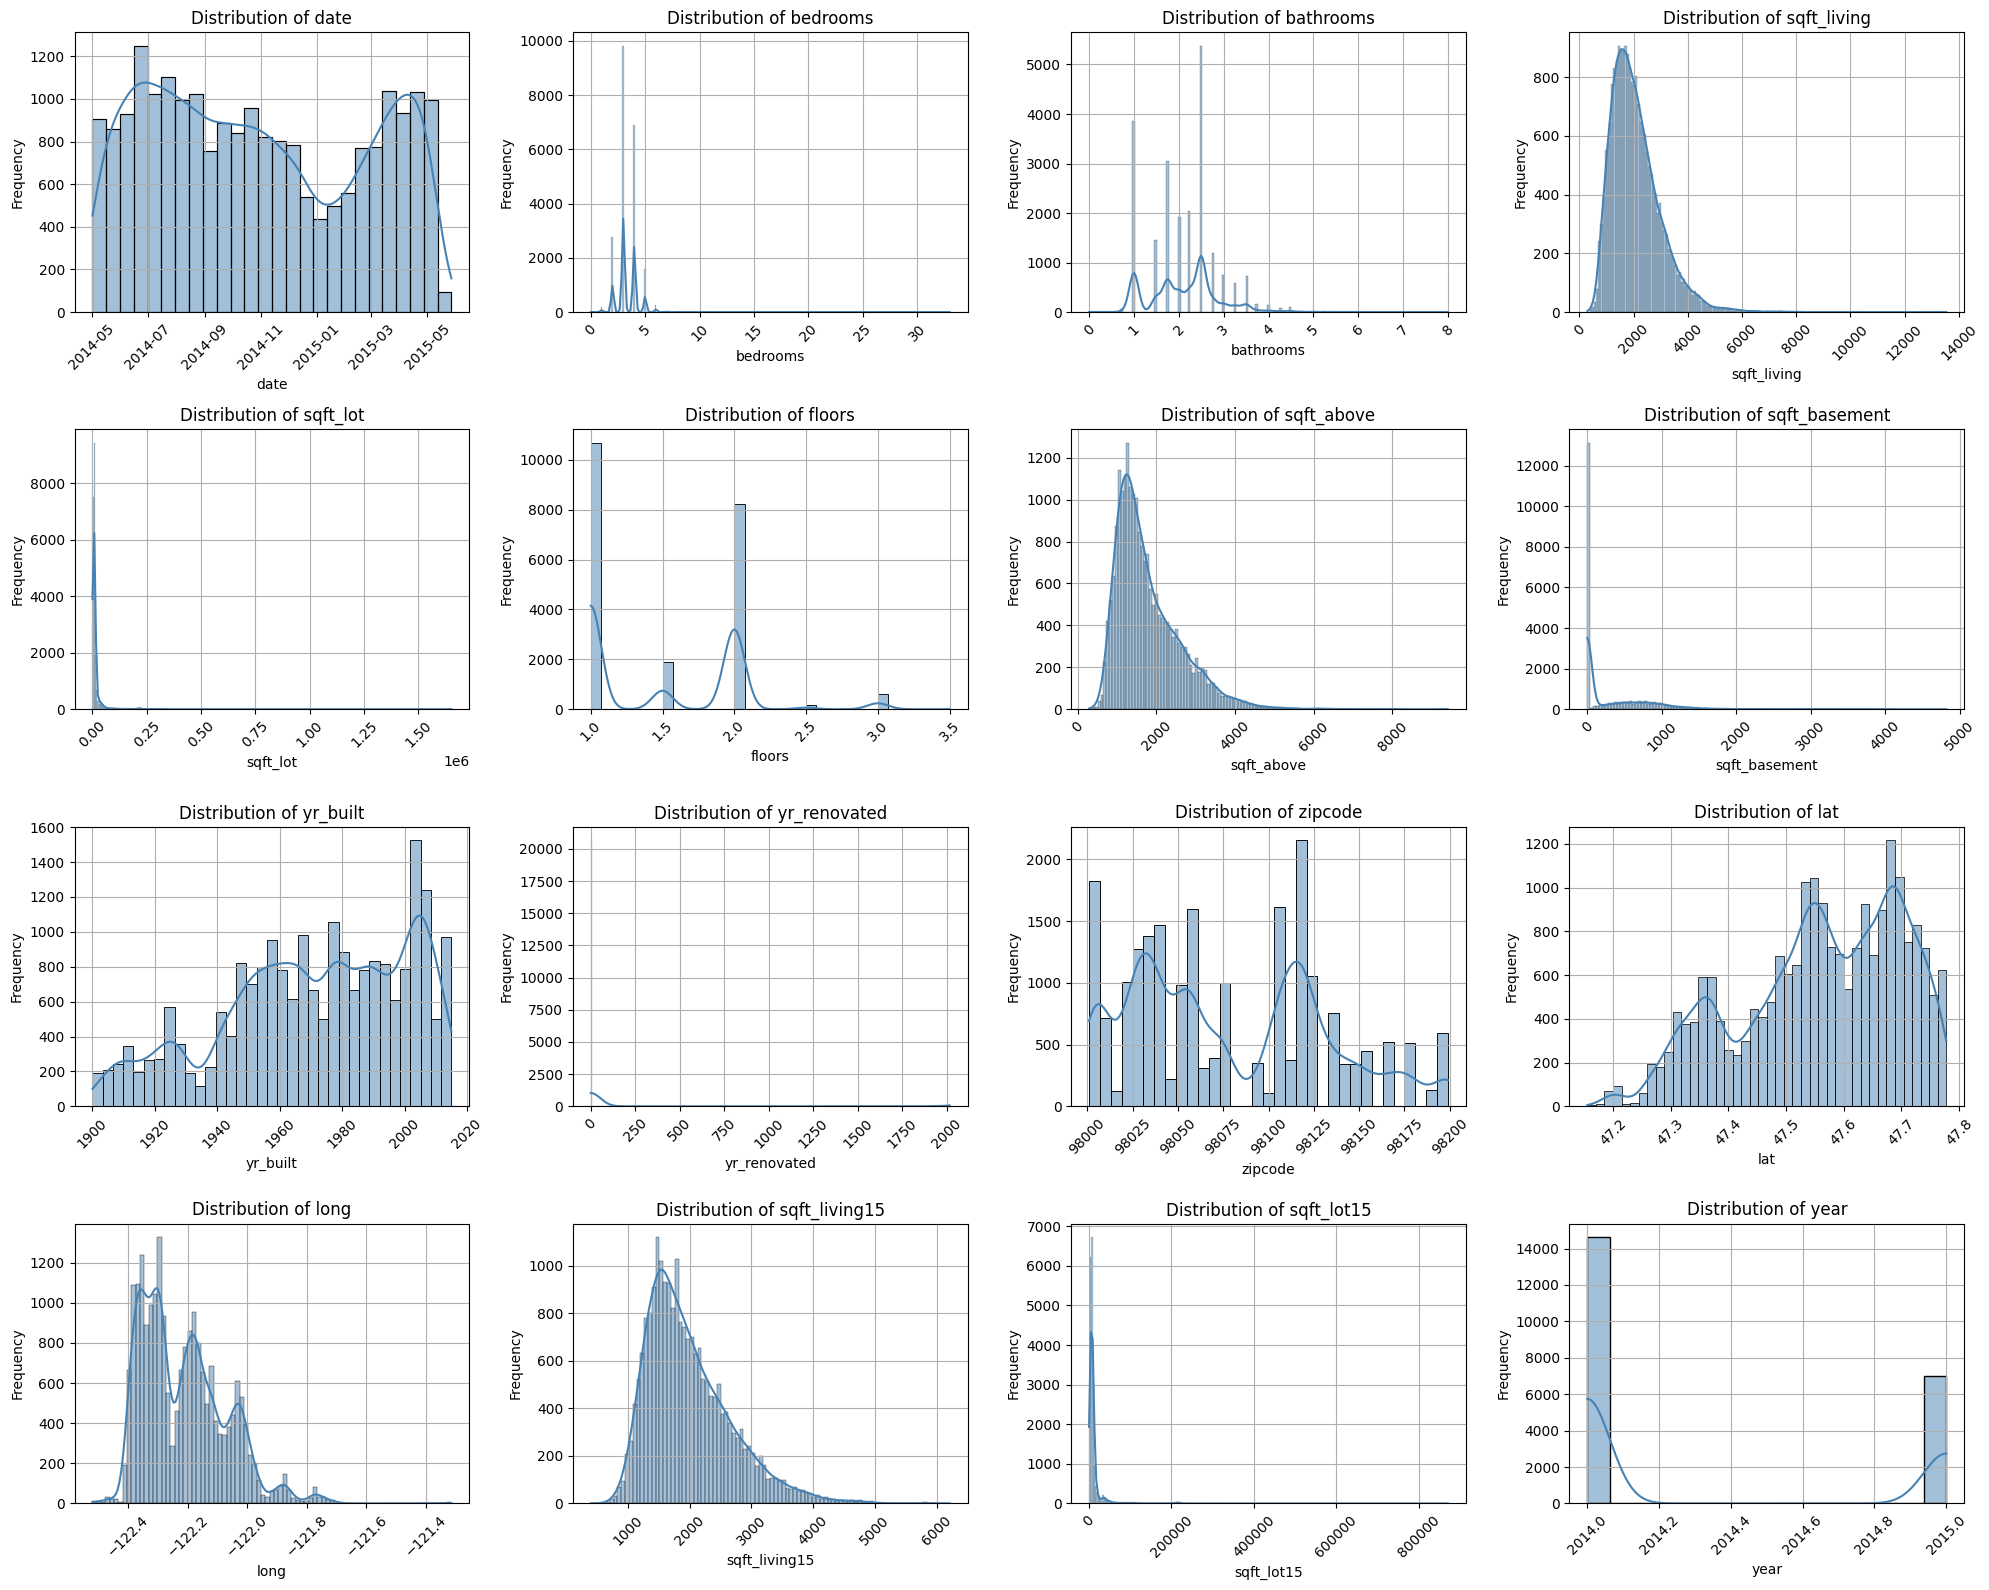

In [17]:
plot_all_numeric(
    df, features=DATE_FEATURES_LIST + NUMERICAL_FEATURES_LIST, cols=4, figsize=(5, 4)
)

**bedrooms** (количество спален): 
  
- Значения: [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 33]

- Можно попробовать разбить на несколько групп: 0, 1-2, 3-5, 6+

**bathrooms** (количество ванных комнат):

- Значения: [0.  , 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 , 2.75,
  3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  , 5.25, 5.5 ,
  5.75, 6.  , 6.25, 6.5 , 6.75, 7.5 , 7.75, 8.  ]

- Можно попробовать разбить на несколько групп: 0, 0.5-1.75, 2-5, 6+

**sqft_living** (общая площадь жилых помещений):
  
- **Положительная асимметрия (правосторонняя)** - использовать **логарифмическое преобразование** для симметризации.

**sqft_lot** (площадь земельного участка):
  
- **Сильная положительная асимметрия (правосторонняя)** - использовать **логарифмическое преобразование** для симметризации.

**floors** (количество этажей): 
  
- Значения: [1. , 1.5, 2. , 2.5, 3. , 3.5]

- Можно попробовать разбить на несколько групп: 1-1.5, 2-2.5, 3+

**sqft_above** (площадь жилой зоны над уровнем земли):
  
- **Положительная асимметрия (правосторонняя)** - использовать **логарифмическое преобразование** для симметризации.

**sqft_basement** (площадь подвала):
  
- Присутствует очень много 0 (у многих домов нет подвала).

- Можно создать новый признак есть ли подвал (0 - нет, 1 - есть)

**yr_built** (год постройки дома):
  
- Наблюдается рост количества построенных домов со временем

**yr_renovated** (год последней реконструкции дома):
  
- Присутствует очень много 0 (многие дома не реконструировались).

- Можно создать новый признак была ли реконструкция (0 - нет, 1 - была)

**sqft_living15** (средняя площадь жилого пространства ближайших 15 соседей):
  
- **Небольшая положительная асимметрия (правосторонняя)** - использовать **логарифмическое преобразование** для симметризации.

**sqft_lot15** (средняя площадь земельных участков ближайших 15 соседей):
  
- **Очень сильная положительная асимметрия (правосторонняя)** - использовать **логарифмическое преобразование** для симметризации.

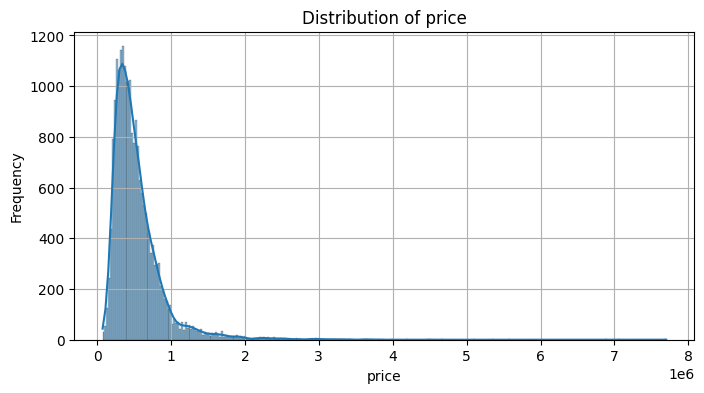

In [18]:
plot_hist_numeric(df, TARGET)

**price** (цена продажи дома):
  
- **Положительная асимметрия (правосторонняя)** - использовать **логарифмическое преобразование** для симметризации.

### 3.2 Категориальные переменные

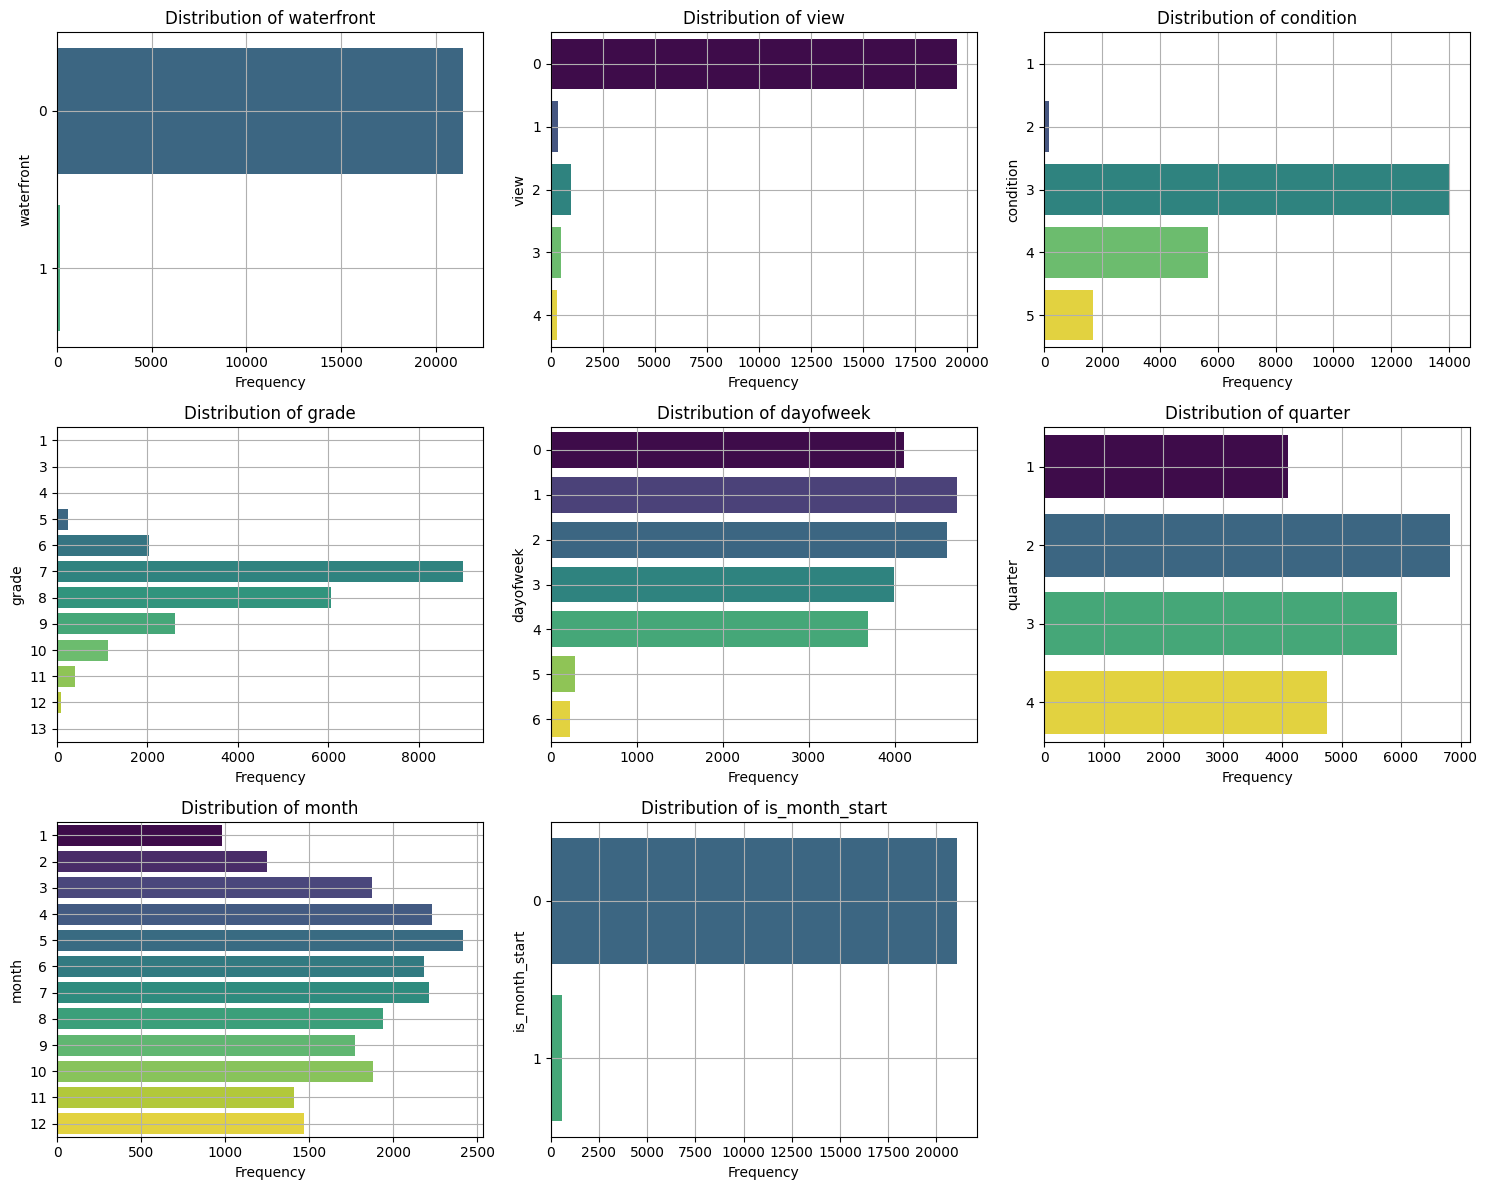

In [20]:
plot_all_categorical(df, cols=3, features=CATEGORICAL_FEATURES_LIST)

**waterfront** (находится ли недвижимость у воды):

- Абсолютное большинство домов не находятся у воды 

**view** (рейтинг вида из дома от 0 до 4):

- Абсолютное большинство домов имеют рейтинг вида 0

**condition** (состояние жилья):

- У большинства домов среднее состояние жилья (3). Домов с плохим состоянием (1-2) практически нет

**grade** (оценка качества конструкции и дизайна; от 1 до 13):

- У большинства домов среднее качество (7-8). Домов с плохим качеством (1-4), как и с идельным качеством (12-13) практически нет

**dayofweek** (день недели продажи дома, 0-понедельник):

- Меньше всего продаж в субботу и воскресенье

**quarter** (временной квартал продажи дома):

- Больше всего продаж во 2 квартале года, но в целом продажи по кварталам распределены достаточно равномерно

**month** (месяц продажи дома):

- Больше всего продаж с 3 по 10 месяцы, в начале и конце года наблюдается спад

**is_month_start** (является ли дата первым числом месяца продажи дома):

- Абсолютное число дат продажи домов не являются первым числом месяца

## 4. Изучение взаимосвязей между признаками

### 4.1 Общая матрица корреляций

In [21]:
# удаляем столбец customerID, поскольку он не несет пользы в дальнейшем исследовании
df = df.drop(columns=["id"])

interval columns not set, guessing: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'dayofweek', 'quarter', 'is_month_start', 'month', 'year']


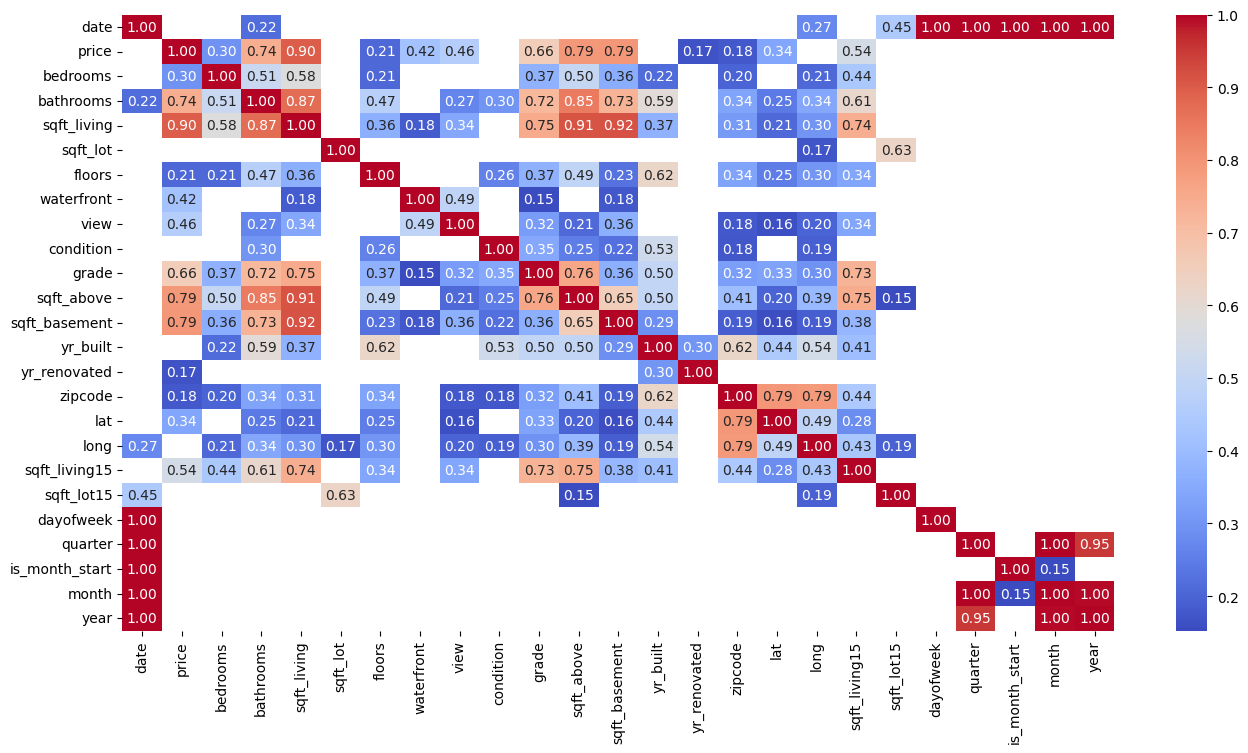

In [22]:
plot_phik(df, figsize=(16, 8), threshold=0.15)

- **Сильная группа признаков, связанных с размерами дома**:  
  *sqft_living*, *sqft_above*, *sqft_basement*, *grade*, *bathrooms* имеют очень высокие взаимные корреляции (0.7–0.92).  
  Это указывает на сильную избыточность - все они описывают один и тот же скрытый фактор: **размер и качество дома**.

- **Площадь участка (*sqft_lot*)** почти не связана с ценой (0.21) - размер участка не влияет значительно на стоимость,  
  но умеренно коррелирует с *floors* (0.36) и *sqft_lot15* (0.63).

- **Показатели близлежащих домов** (*sqft_living15* и *sqft_lot15*) связаны с соответствующими характеристиками этого дома  
  (*sqft_living* - 0.74, *sqft_lot* - 0.63), но слабее влияют на цену напрямую.

- **Географические координаты**:  
  - *zipcode*, *lat*, *long* имеют заметные взаимные связи (до 0.79), отражая пространственную структуру данных.  
  - Корреляция с *price* умеренная (0.18-0.34) - расположение влияет, но не решающе.

- **Качество конструкции (*grade*)** сильно коррелирует с *sqft_living* (0.75) и *bathrooms* (0.72).  

- **Нахождение у воды и вид**:  
  - *waterfront* (0.42) и *view* (0.46) заметно связаны с ценой.  
  - Эти признаки выражают **премиум‑расположение**, добавляющее стоимости независимо от других метрик.

- **Слабые связи:**  
  *date* (и его производные), *floors*, *zipcode*, *condition* имеют слабую или незначимую корреляцию с основными признаками и *price*.  

- **Цена дома (*price*)** максимально коррелирует с:  
  *sqft_living* (0.90), *sqft_above* (0.79), *sqft_basement* (0.79), *bathrooms* (0.74), *grade* (0.66), *sqft_living15* (0.54).  
  **Чем больше площадь и выше качество строительства, тем выше цена**.

### 4.2 Подробное изучение корреляций между выбранными парами

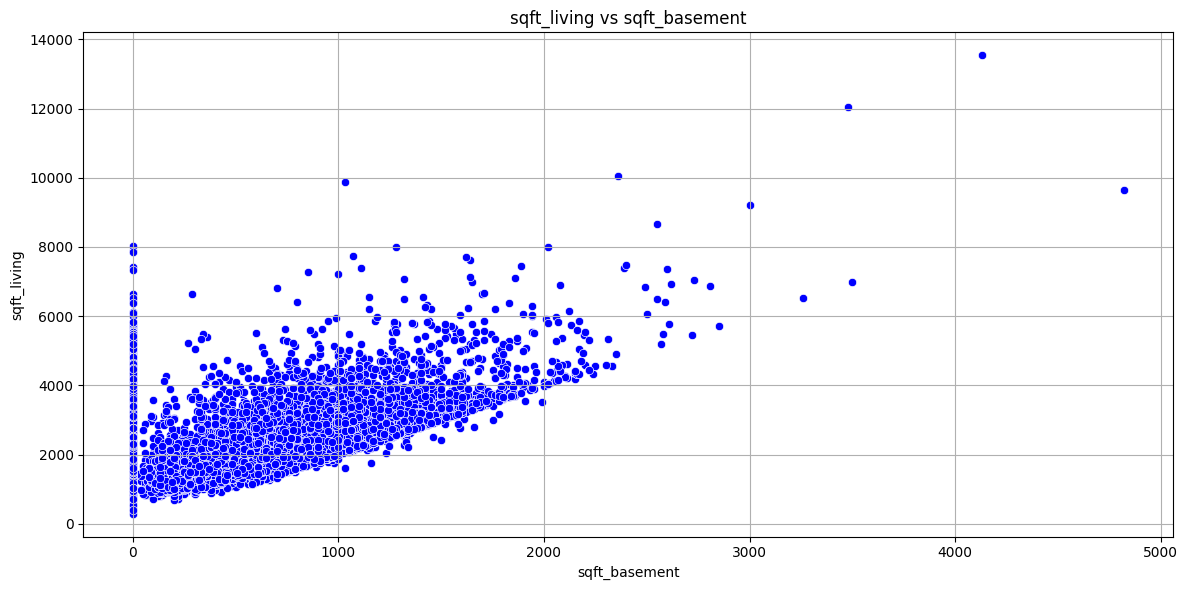

In [24]:
plot_numeric_relationship(
    df, x_col="sqft_basement", y_col="sqft_living", figsize=(12, 6)
)

Большинство домов не имеют подвала, при этом наблюдается положительная зависимость между площадью подвала и общей жилой площадью.

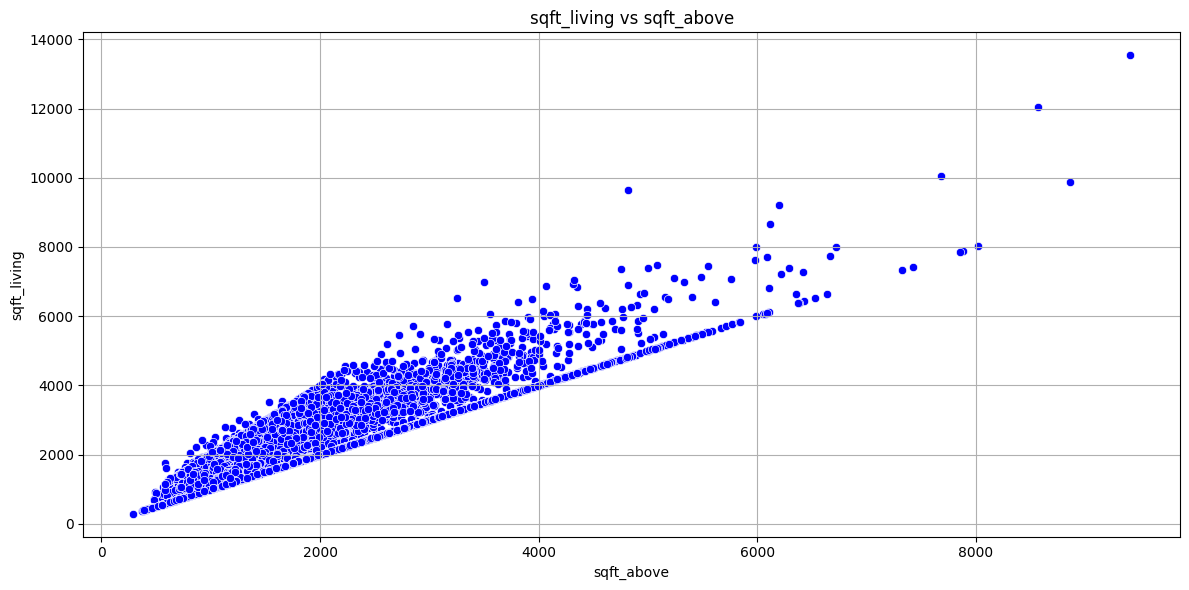

In [25]:
plot_numeric_relationship(df, x_col="sqft_above", y_col="sqft_living", figsize=(12, 6))

Между площадью жилого пространства и площадью надземной части дома логично наблюдается сильная положительная корреляция - чем больше площадь надземной части, тем больше общая жилая площадь.

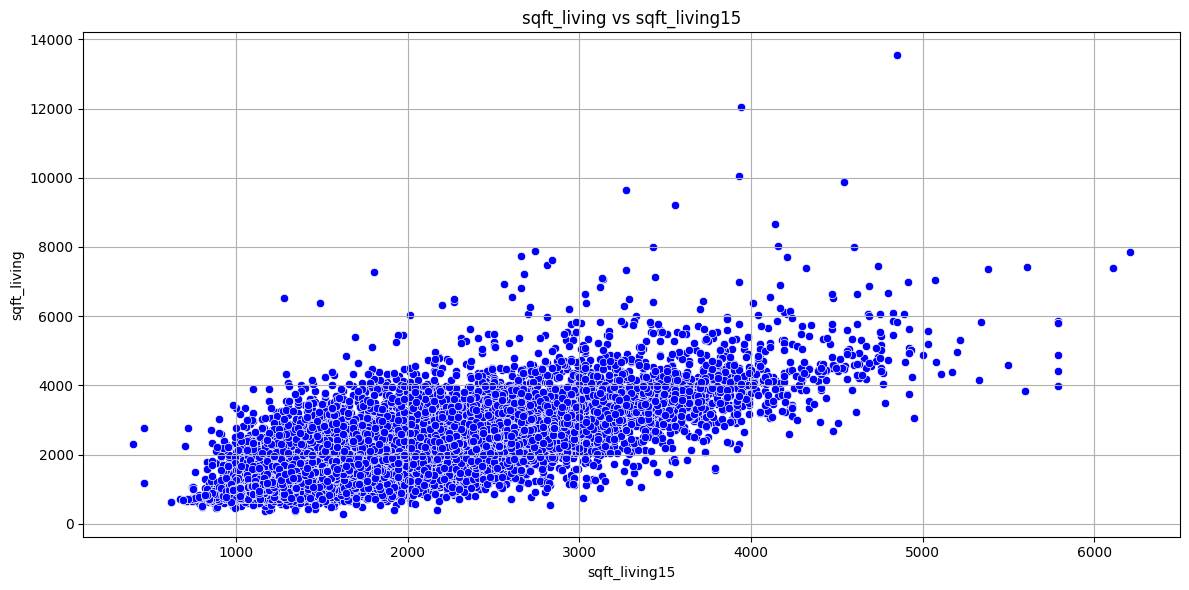

In [26]:
plot_numeric_relationship(
    df, x_col="sqft_living15", y_col="sqft_living", figsize=(12, 6)
)

Наблюдается явная положительная зависимость между площадью жилья и средней жилой площадью ближайших 15 домов - чем больше площадь дома, тем больше площади соседних домов.

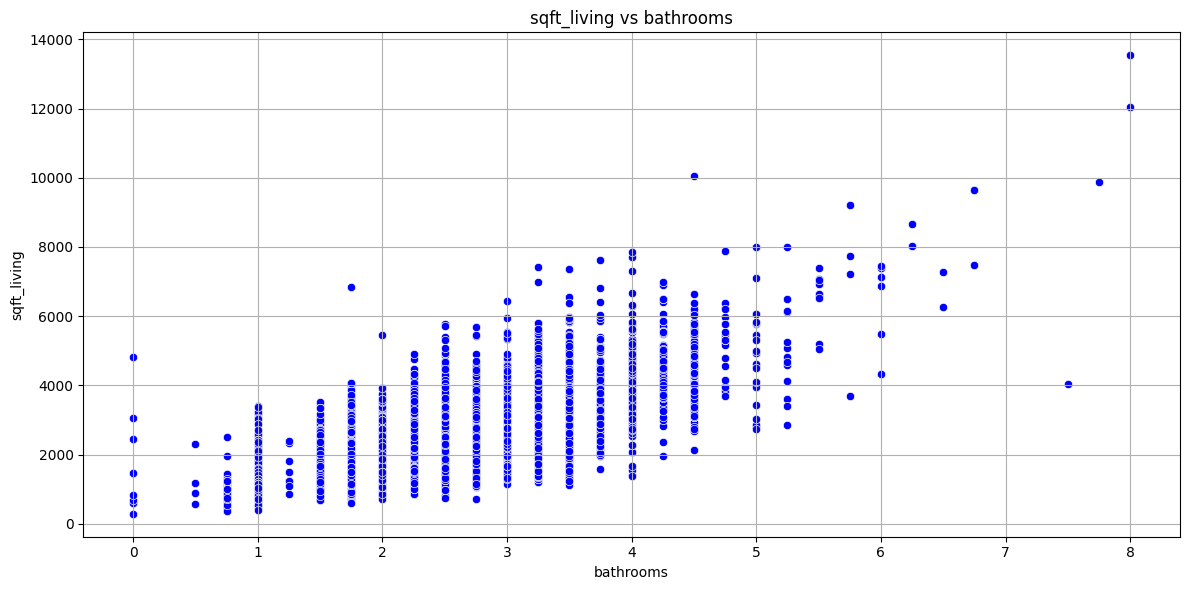

In [27]:
plot_numeric_relationship(df, x_col="bathrooms", y_col="sqft_living", figsize=(12, 6))

c:\Users\Kirill\Desktop\ML_Projects\ml-regression\plots.py:220: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


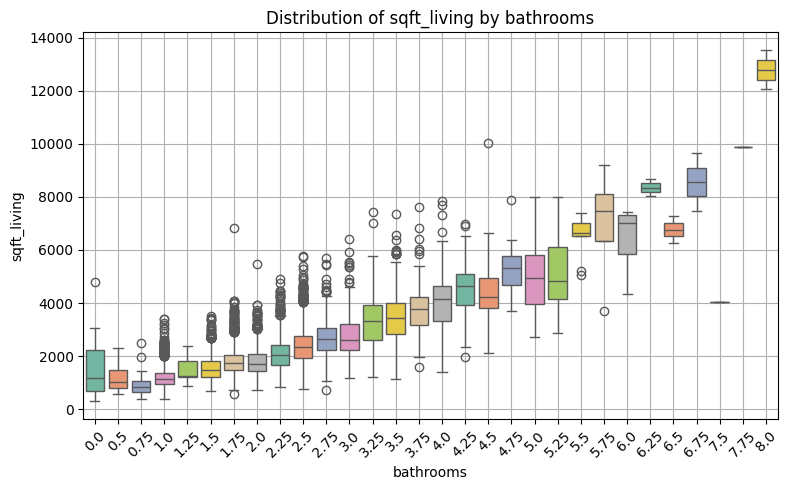

In [28]:
plot_numeric_vs_categorical_boxplot(
    df,
    numerical_feature="sqft_living",
    categorical_feature="bathrooms",
    figsize=(8, 5),
)

Чем больше в доме ванных комнат, тем больше его общая жилая площадь - наблюдается отчётливая положительная зависимость.

c:\Users\Kirill\Desktop\ML_Projects\ml-regression\plots.py:220: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


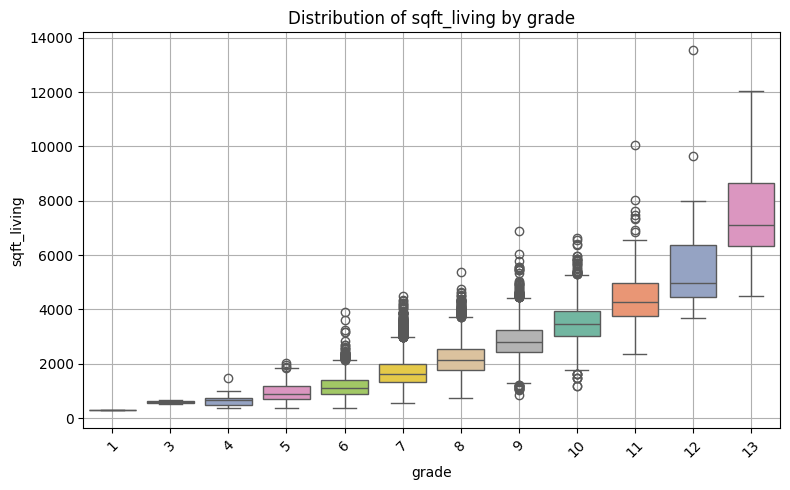

In [29]:
plot_numeric_vs_categorical_boxplot(
    df,
    numerical_feature="sqft_living",
    categorical_feature="grade",
    figsize=(8, 5),
)

С ростом оценки дома (**grade**) увеличивается и жилая площадь - дома более высокого качества обычно значительно просторнее.

c:\Users\Kirill\Desktop\ML_Projects\ml-regression\plots.py:220: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


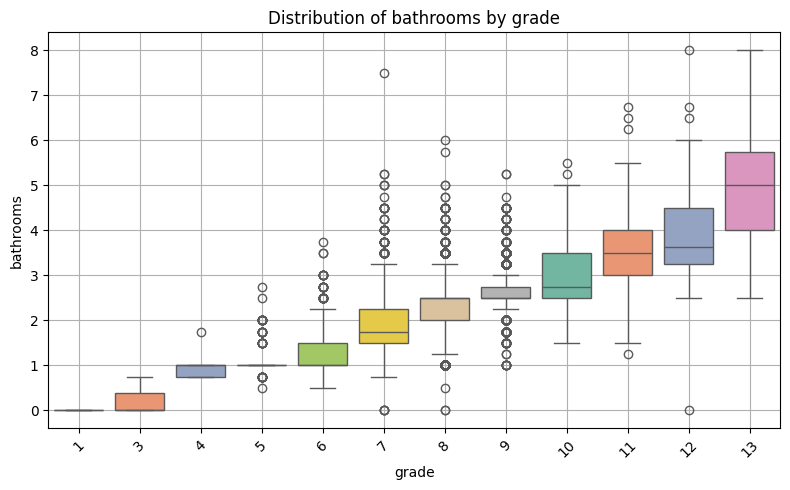

In [30]:
plot_numeric_vs_categorical_boxplot(
    df,
    numerical_feature="bathrooms",
    categorical_feature="grade",
    figsize=(8, 5),
)

С увеличением оценки дома (**grade**) растёт и количество ванных комнат - более качественные дома, как правило, имеют больше санузлов.

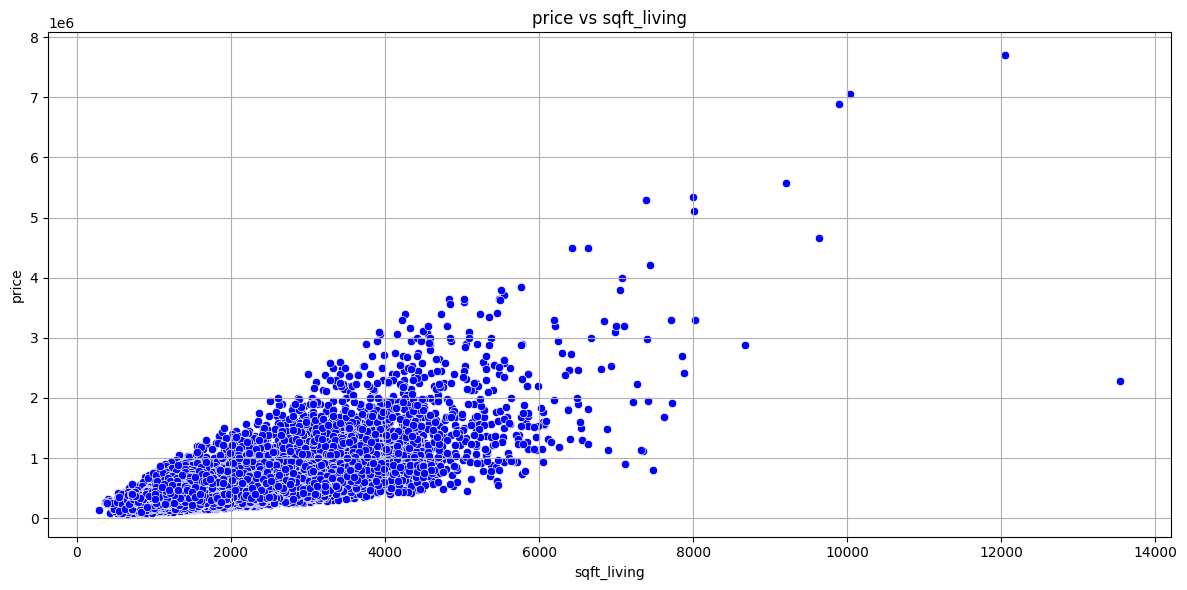

In [31]:
plot_numeric_relationship(df, x_col="sqft_living", y_col="price", figsize=(12, 6))

Наблюдается чёткая положительная зависимость: с увеличением жилой площади (**sqft_living**) растёт и цена дома (**price**).

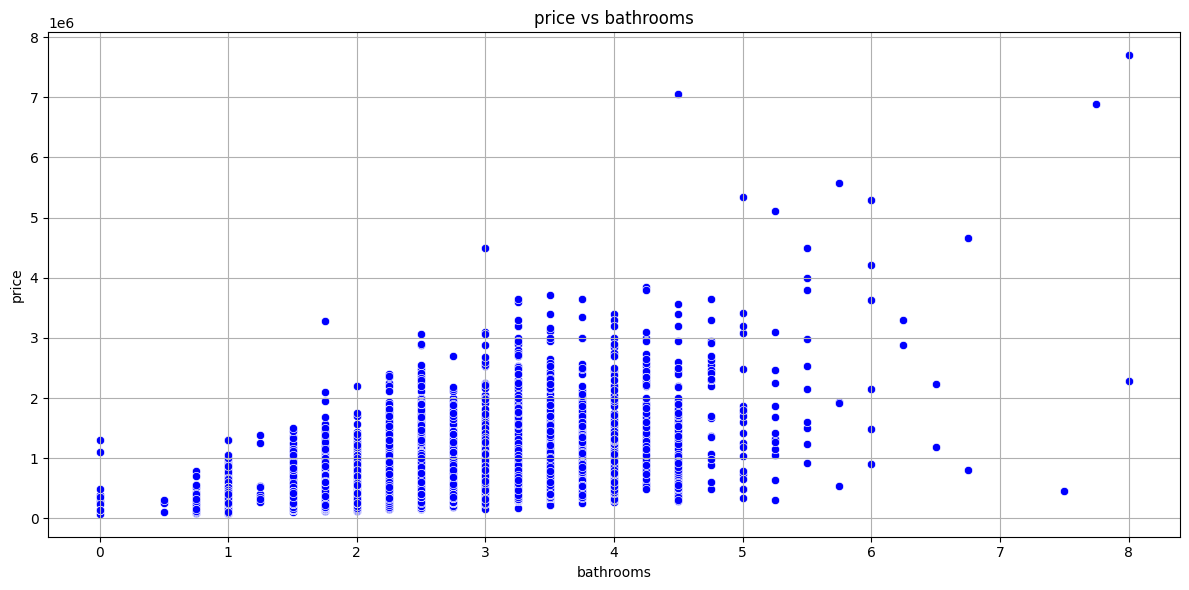

In [32]:
plot_numeric_relationship(df, x_col="bathrooms", y_col="price", figsize=(12, 6))

Чем больше в доме ванных комнат, тем выше его цена - прослеживается положительная зависимость между количеством санузлов и стоимостью жилья.

c:\Users\Kirill\Desktop\ML_Projects\ml-regression\plots.py:220: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


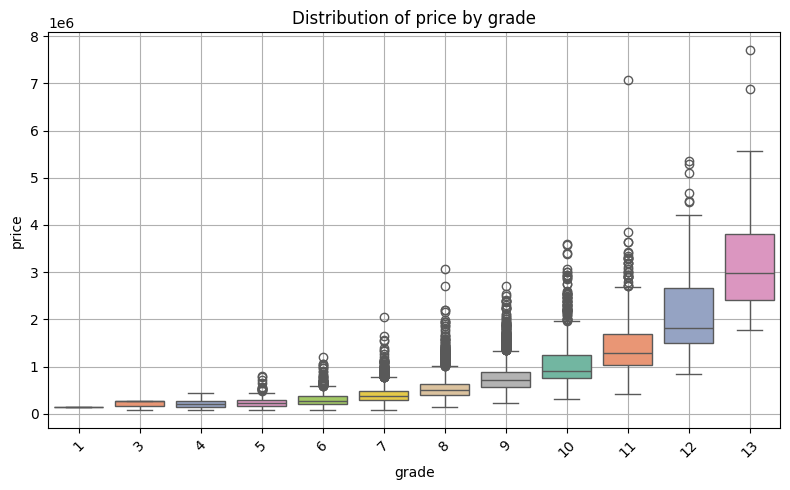

In [33]:
plot_numeric_vs_categorical_boxplot(
    df,
    numerical_feature="price",
    categorical_feature="grade",
    figsize=(8, 5),
)

С ростом оценки дома (**grade**) существенно увеличивается его цена - более качественные и престижные дома стоят заметно дороже.

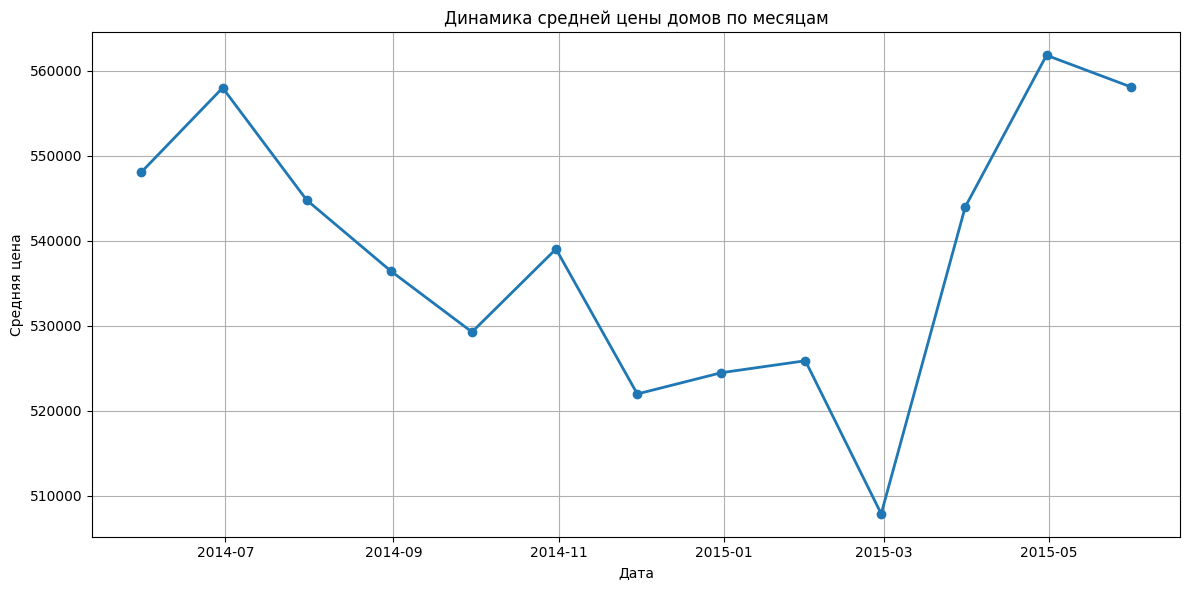

In [50]:
plot_price_trend(df, freq="ME")

Наблюдается изменение цены дома по месяцам

## Выводы

- Датасет не имеет пропусков и дубликатов.

- Отрицательных значений нет. Лишних значений в категориальных признаках нет.

- **Сильная группа признаков, связанных с размерами дома**:  
  *sqft_living*, *sqft_above*, *sqft_basement*, *grade*, *bathrooms* имеют очень высокие взаимные корреляции (0.7–0.92).  
  Это указывает на сильную избыточность - все они описывают один и тот же скрытый фактор: **размер и качество дома**.

- **Площадь участка (*sqft_lot*)** почти не связана с ценой (0.21) - размер участка не влияет значительно на стоимость,  
  но умеренно коррелирует с *floors* (0.36) и *sqft_lot15* (0.63).

- **Показатели близлежащих домов** (*sqft_living15* и *sqft_lot15*) связаны с соответствующими характеристиками этого дома  
  (*sqft_living* - 0.74, *sqft_lot* - 0.63), но слабее влияют на цену напрямую.

- **Географические координаты**:  
  - *zipcode*, *lat*, *long* имеют заметные взаимные связи (до 0.79), отражая пространственную структуру данных.  
  - Корреляция с *price* умеренная (0.18-0.34) - расположение влияет, но не решающе.

- **Качество конструкции (*grade*)** сильно коррелирует с *sqft_living* (0.75) и *bathrooms* (0.72).  

- **Нахождение у воды и вид**:  
  - *waterfront* (0.42) и *view* (0.46) заметно связаны с ценой.  
  - Эти признаки выражают **премиум‑расположение**, добавляющее стоимости независимо от других метрик.

- **Слабые связи:**  
  *date*, *floors*, *zipcode*, *condition* имеют слабую или незначимую корреляцию с основными признаками и *price*.  

- **Цена дома (*price*)** максимально коррелирует с:  
  *sqft_living* (0.90), *sqft_above* (0.79), *sqft_basement* (0.79), *bathrooms* (0.74), *grade* (0.66), *sqft_living15* (0.54).  
  **Чем больше площадь и выше качество строительства, тем выше цена**.

- Меньше всего продаж в субботу и воскресенье.

- **bedrooms:** можно сгруппировать как 0, 1-2, 3-5, 6+.  
- **bathrooms:** можно сгруппировать как 0, 0.5-1.75, 2-5, 6+.
- **floors:** можно сгруппировать как 1-1.5, 2-2.5, 3+.
- **sqft_living, sqft_lot, sqft_above, sqft_living15, sqft_lot15, price:** применить логарифмическое преобразование (правосторонняя асимметрия).  
- **sqft_basement:** много нулей, создать бинарный признак "наличие подвала".  
- **yr_renovated:** много нулей, создать бинарный признак "реконструирован / нет".
- Необходимо учитывать **дату продажи дома *date*** при разбиении на обучающую и тестовую выборки, а также использовать TimeSeriesSplit при кроссвалидации.